### Import required packages

In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

# Helper function for plotting

In [2]:
#this function helps us to plot the confusion matrix for our model
def make_confusion_matrix(model, threshold=0.5):
    """
    Predict class 1 if probability of being in class 1 is greater than threshold
    (model.predict(X_test) does this automatically with a threshold of 0.5)
    """
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['attack', 'non-attack'],
           yticklabels=['attack', 'non-attack']);
    plt.xlabel('prediction')
    plt.ylabel('actual')


In [5]:
train = pd.read_csv('data/cleaned_train.csv')

In [6]:
# Numeric features column names
df_numeric = train.select_dtypes(include=np.number)

### Split the data to features and target

In [7]:
X = df_numeric.iloc[:,1:-1]
y = df_numeric.iloc[:, -1]

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42 , stratify=y)

### Baseline model: linear regression

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_val)
print("The score for lr is")
print("Training: {:6.2f}%".format(100*lr.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*lr.score(X_val, y_val)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
print('F1 : {:6.4f}'.format(f1_score(y_val, y_predict)))

The score for lr is
Training:  85.17%
Test set:  85.14%
Precision: 0.8386,   Recall: 0.9680
F1 : 0.8987


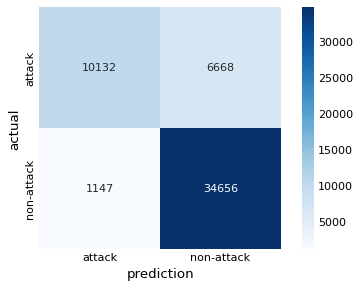

In [10]:
make_confusion_matrix(lr)